In [ ]:
!nvidia-smi

Thu Apr 20 00:45:11 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 529.2/529.2 kB 36.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.8/198.8 kB 23.8 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.83 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.3/78.2 GB disk)


In [ ]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


- Use this dataset

In [ ]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="##############")
project = rf.workspace("kapustin-danil").project("wildfire-and-smoke")
dataset = project.version(11).download("yolov8")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.2/56.2 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.3 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=acd7e828146ca8e6cfa8555a84a56e34f7ca43e8bd1321be26c649013db456b0
  Stored in directory: /root/.cache/pip/wheels/04/5f/3e/46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstalling idna-3.4:
   

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.83, to fix: `pip install ultralytics<=8.0.20`

Extracting Dataset Version Zip to Wildfire-and-smoke-11 in yolov8::   1%|          | 128/10594 [01:35<2:09:31,  1.35it/s]

In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data=/content/drive/MyDrive/Wildfire-and-smoke-11/data.yaml epochs=25 imgsz=640 plots=True batch=32 val=True pretrained=False lr0=0.001

Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/drive/MyDrive/Wildfire-and-smoke-11/data.yaml, epochs=25, patience=50, batch=32, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynam

In [ ]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


- Test on an image

In [ ]:
%cd /content/drive/MyDrive/runs/detect/train16

/content/drive/MyDrive/runs/detect/train16


In [ ]:
%ls

weights/


In [ ]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
#the best one train16
!yolo task=detect mode=predict model=/content/drive/MyDrive/runs/detect/train16/weights/best.pt conf=0.3 source=/content/Large_bonfire.jpg save=True save_txt=True

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.9/dist-packages/ultralytics/yolo/cfg/__init__.py", line 230, in entrypoint
    model = YOLO(model)
  File "/usr/local/lib/python3.9/dist-packages/ultralytics/yolo/engine/model.py", line 60, in __init__
    {'.pt': self._load, '.yaml': self._new}[suffix](model)
  File "/usr/local/lib/python3.9/dist-packages/ultralytics/yolo/engine/model.py", line 90, in _load
    self.model, self.ckpt = attempt_load_one_weight(weights)
  File "/usr/local/lib/python3.9/dist-packages/ultralytics/nn/tasks.py", line 384, in attempt_load_one_weight
    ckpt = torch_safe_load(weight)  # load ckpt
  File "/usr/local/lib/python3.9/dist-packages/ultralytics/nn/tasks.py", line 332, in torch_safe_load
    return torch.load(file, map_location='cpu')  # load
  File "/usr/local/lib/python3.9/dist-packages/torch/serialization.py", line 791, in load
    with _open_file_like(f, '

In [ ]:
%cd 

/


In [ ]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


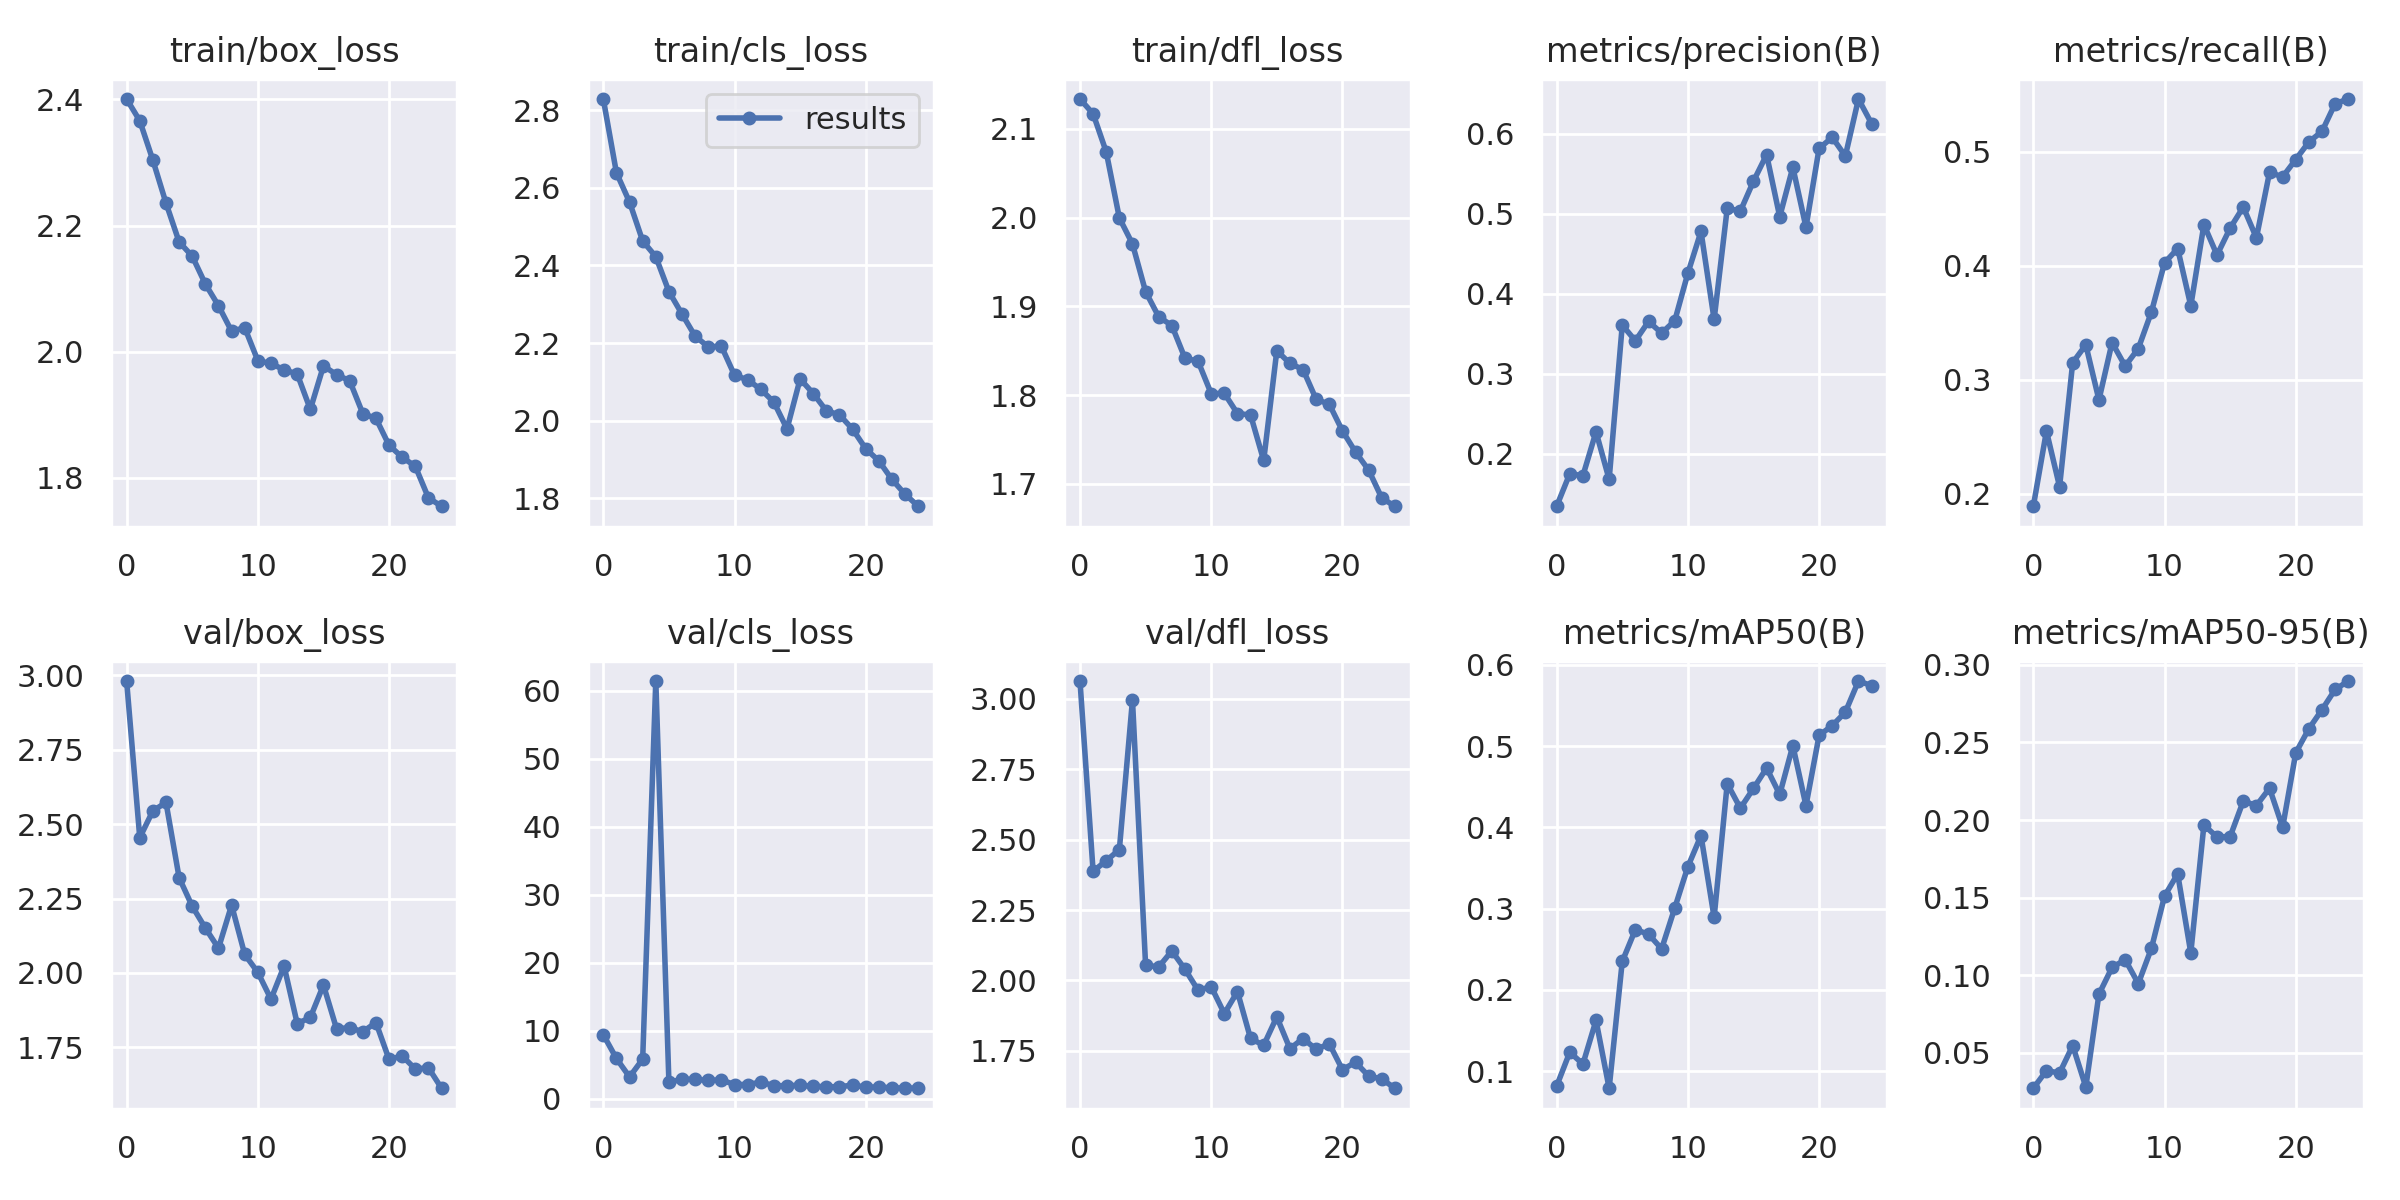

In [ ]:
Image(filename='/content/drive/MyDrive/runs/detect/train11/results.png', width=600)